# Competition Game

### Game Initialization
- Platforms' initial capital, expenses per day are set, and trunover interval.

### Game Rules
1. The game starts on a random cell.
2. Platforms can make turn-based moves to adjacent cells.
3. On each move, platforms carry their gains and losses to the next cell. This means platforms' movements generate a trajectory on the grid.
4. The game continues until one platform reaches negative capital (or until both platforms stabilize their state even if one platform is already out of the game).

### Dimensions to Explore with Experiments
1. **Output Equilibrium**: 
   - Market-sharing
   - Winner takes it all
   - Tragedy of the commons
2. **Initial Capital**:
   - Low
   - Medium
   - High
3. **Starting Position**
   - Both platforms start with the same fares (low or high fares)
   - They start with different fares
4. **Multi-homing Impact**
   - considering different frequency of switching between platforms
5. **Regulations Impact**
   - Minimum wage regulations (like it happened in 2019 in NYC)
   - Maximum trip fare
   - Cap on the number of drivers

*Modifying (increasing/decreasing) trip fare has mixed effects: 
1. On the one hand it encourages the travellers to leave/join the platform
2. On the other hand encourages more/less drivers to join the platform

*Increasing market share of platform (both supply and demand) reduces price elasticity of demand. Platforms can benefit this to increase the price without singificantly affecting the demand market share.


In [ ]:
Initial experiments:
1- Both platforms start with low fare
2- Both platforms start with high fare
3- one of them start with low and the other on start with high

Consider infinite capital first, then populate the results for low, medium, and high capitals. 

In [1]:
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import numpy as np
import random
import math

In [2]:
def smooth(y,w=7,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [19]:
trajectory_1_1 = [(1.0, 1.0),(1.0, 1.2),(1.2, 1.2),(1.2, 1.4),(1.4, 1.4),(1.4, 1.6),(1.4, 1.6),(1.4, 1.6),(1.6, 1.6),(1.6, 1.6),(1.4, 1.6)]

trajectory_14_14 = [(1.4, 1.4),(1.4, 1.6),(1.2, 1.6),(1.2, 1.8),(1.2, 1.8),(1.2, 1.8),(1.4, 1.8),(1.4, 2.0),(1.4, 2.0),(1.4, 2.0),(1.4, 2.0)]

trajectory_16_16 = [(1.6, 1.6),(1.6, 1.8),(1.4, 1.8),(1.4, 2.0),(1.4, 2.0),(1.4, 2.0),(1.6, 2.0),(1.6, 2.0),(1.6, 2.0),(1.6, 1.8),(1.6, 1.8)]

trajectory_2_2 = [(2.0, 2.0),(2.0, 2.0),(2.0, 2.0),(2.0, 1.8),(2.0, 1.8),(2.0, 1.6),(2.0, 1.6),(2.0, 1.4),(2.0, 1.4),(2.0, 1.4),(2.0, 1.4)]

trajectory_1_2 = [(2.0, 1.0),(2.0, 1.2),(2.0, 1.2),(2.0, 1.4),(2.0, 1.4),(2.0, 1.6),(2.0, 1.6),(2.0, 1.6),(2.0, 1.6),(2.0, 1.6),(2.0, 1.6)]

trajectory_14_16 = [(1.6, 1.4),(1.6, 1.6),(1.4, 1.6),(1.4, 1.4),(1.2, 1.4),(1.2, 1.6),(1.4, 1.6),(1.4, 1.8),(1.6, 1.8),(1.6, 2.0)]

In [20]:
demand_df = pd.read_csv('competition_csv/demand_traj_p1_1.0_p2_2.0.csv')
supply_df = pd.read_csv('competition_csv/supply_traj_p1_1.0_p2_2.0.csv')

trajectory = trajectory_14_16

In [5]:
fares = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

grid_size = len(fares)
grid = np.zeros((grid_size, grid_size), dtype=object)

for i in range(grid_size):
    for j in range(grid_size):
        
        p1 = fares[i]
        p2 = fares[j]
        
        grid[i, j] = round(p2 -p1, 2)

grid

array([[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
       [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8],
       [-0.4, -0.2, 0.0, 0.2, 0.4, 0.6],
       [-0.6, -0.4, -0.2, 0.0, 0.2, 0.4],
       [-0.8, -0.6, -0.4, -0.2, 0.0, 0.2],
       [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0]], dtype=object)

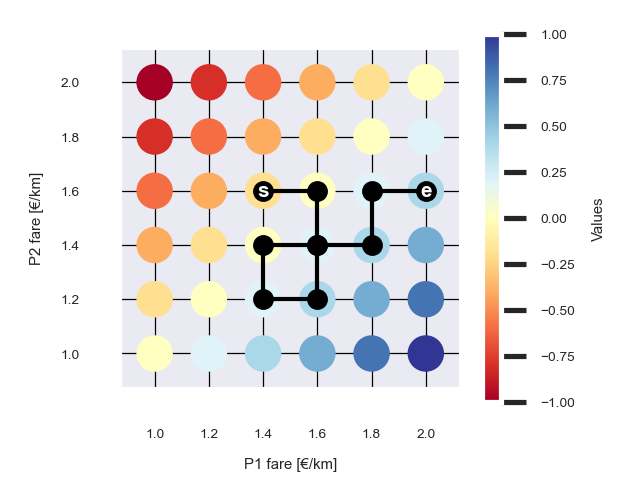

In [21]:
# Set global seaborn and matplotlib parameters
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 200})
sns.set_palette('tab10')
sns.set(font_scale=0.3)

# Define the range of values for x and y axes
x = np.array(fares)
y = np.array(fares)

values = grid

# Create the meshgrid
X, Y = np.meshgrid(x, y)

# Visualize the meshgrid
plt.figure(figsize=(2, 2))  # Adjust figure size as per your requirement
plt.scatter(X, Y, c=values, cmap='RdYlBu', s=60)
# plt.scatter(X, Y, s=60)
plt.title("")
plt.xlabel('P1 fare [€/km]')
plt.ylabel('P2 fare [€/km]')

# Customize ticks and grid lines
plt.xticks(x)
plt.yticks(y)
plt.grid(True, color='black', which='both', linestyle='-', linewidth=0.3, )  # Show grid lines for both major and minor ticks

e = 0.13
plt.xlim(x.min()-e, x.max()+e)
plt.ylim(y.min()-e, x.max()+e)

cbar = plt.colorbar(shrink=0.7) # use shrink to adjust the colorbar width
cbar.ax.set_aspect(20) # use to adjust colorbar height
cbar.set_label('Values')

# Plotting the trajectory
trajectory_x, trajectory_y = zip(*trajectory)
plt.plot(trajectory_y, trajectory_x, marker='o', color='black', linestyle='-', linewidth=1, markersize=4)
plt.text(trajectory_y[0], trajectory_x[0], 's', color='white', fontsize=5, fontweight='bold', ha='center', va='center')
plt.text(trajectory_y[-1], trajectory_x[-1], 'e', color='white', fontsize=5, fontweight='bold', ha='center', va='center')

# Set aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

# plt.gca().set_facecolor('white')
plt.tight_layout()  # Ensures everything fits within the figure area properly
plt.savefig('Figs/p3-Fig_14_16_grid.png')
plt.show()

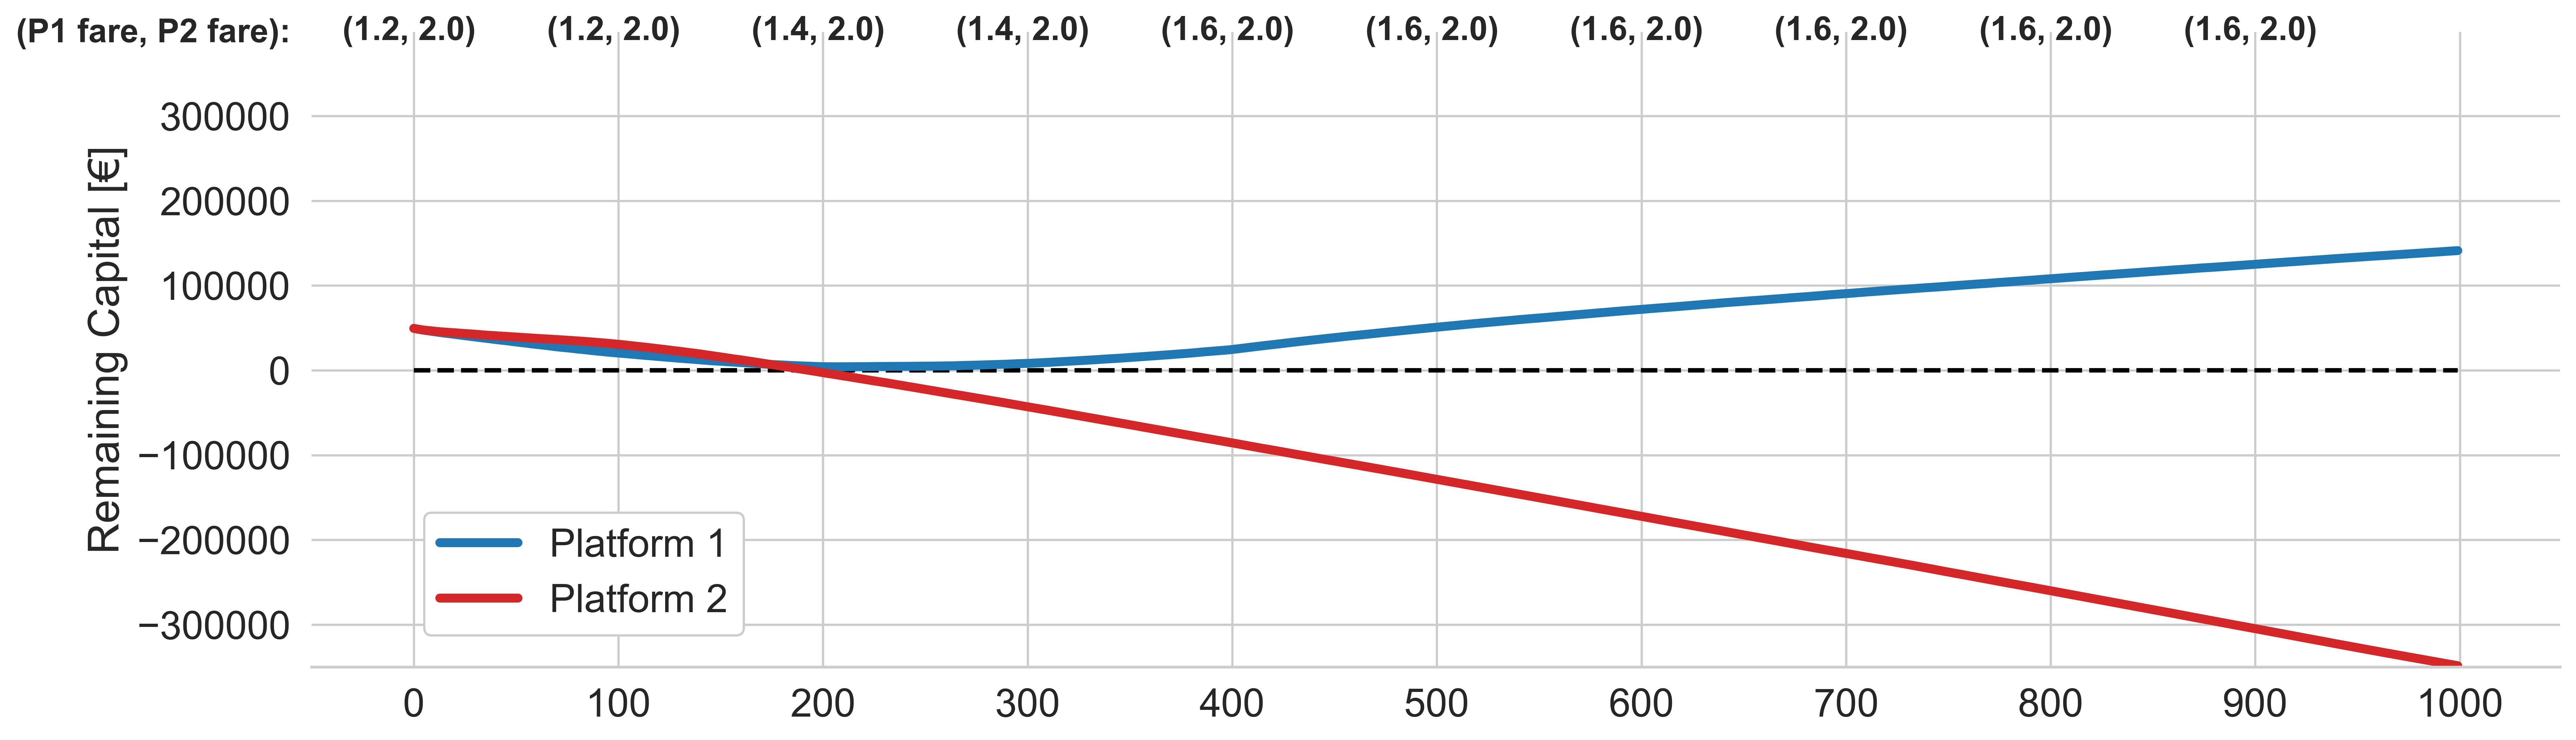

In [16]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,5))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=demand_df.P1_remaining_capital, label = 'Platform 1', color=c1, lw=4)
sns.lineplot(x=demand_df.index, y=demand_df.P2_remaining_capital, label = 'Platform 2', color=c2, lw=4)
ax.set(xlabel='', ylabel='Remaining Capital [€]', ylim = (-350000, 399000))
ax.legend(frameon=True,framealpha=1, loc=(0.05,0.05))

ax.hlines([0], 0, demand_df.index.max(), linestyles='dashed', colors='black', lw=2)

v_grid = np.arange(0, demand_df.index.max() + 2, 100)
ax.set_xticks(v_grid)

new_trajectory = [(y, x) for x, y in trajectory[1:]]
for i in range(10):
        ax.annotate(new_trajectory[i], xy =(v_grid[i]-35, 1e5 + 290000), fontweight='bold', fontsize=15)
fig.text(-0.01, 0.92, '(P1 fare, P2 fare):', va='center', rotation='horizontal', fontweight='bold', fontsize=15)

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/p3-Fig_10_20_cap.png', bbox_inches='tight', pad_inches=0.5)

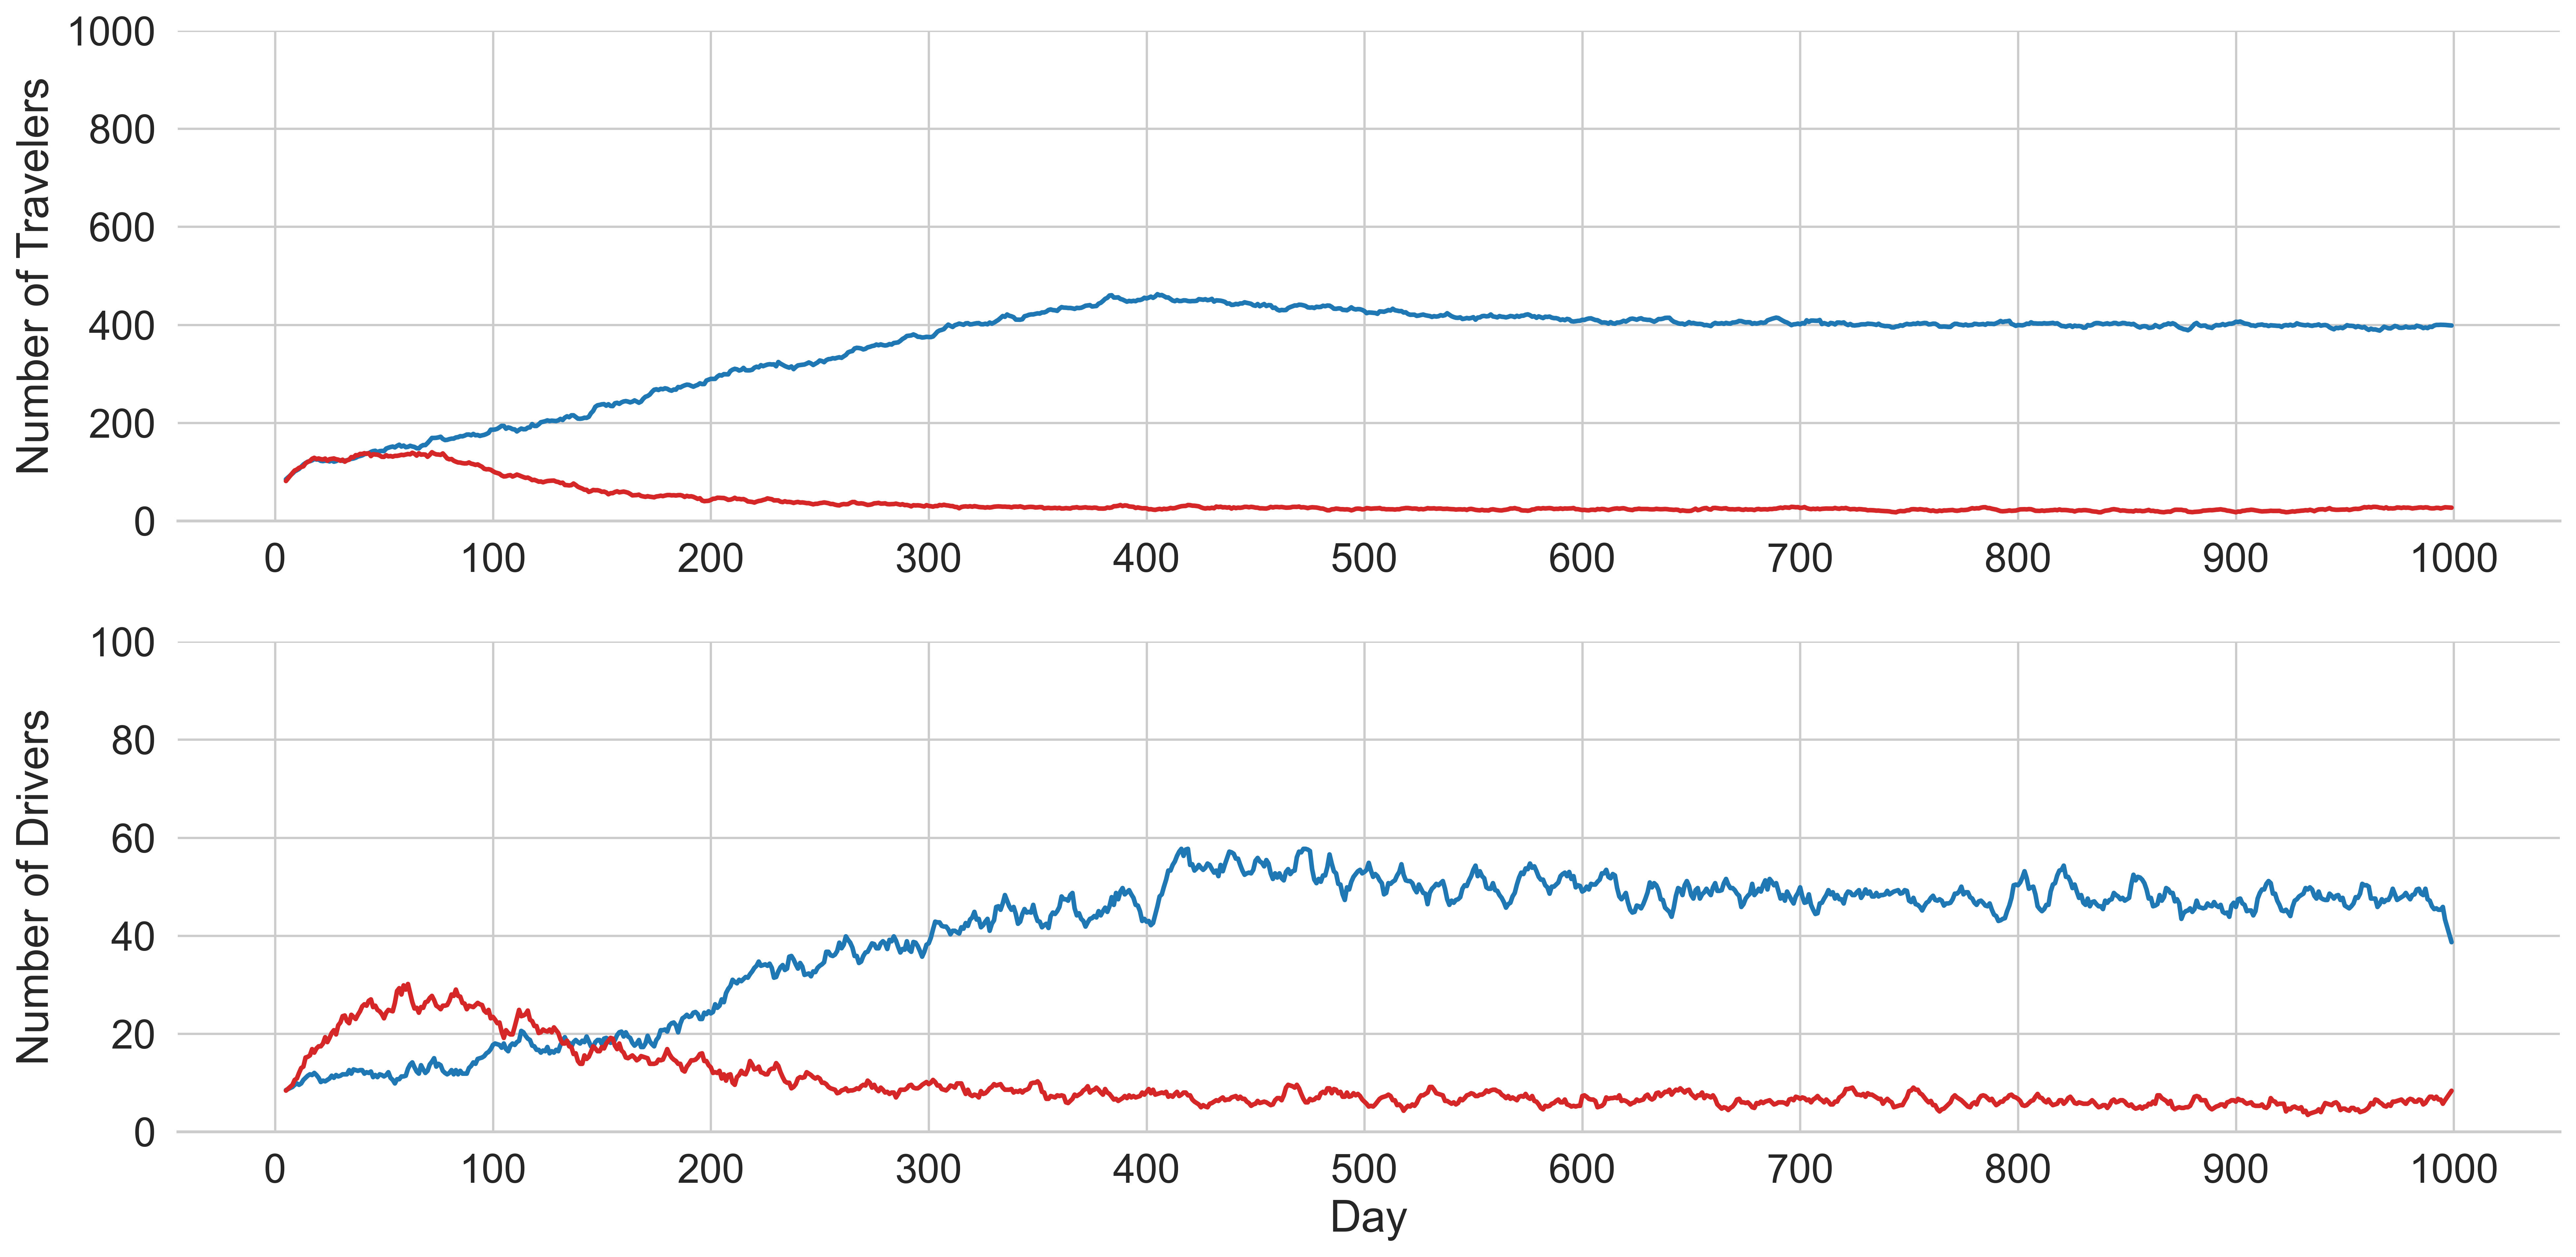

In [17]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_OUT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_OUT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel='Number of Travelers', ylim=(0,1000))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_OUT), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_OUT), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Number of Drivers', ylim=(0,100))

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/p3-Fig_10_20_ms.png')

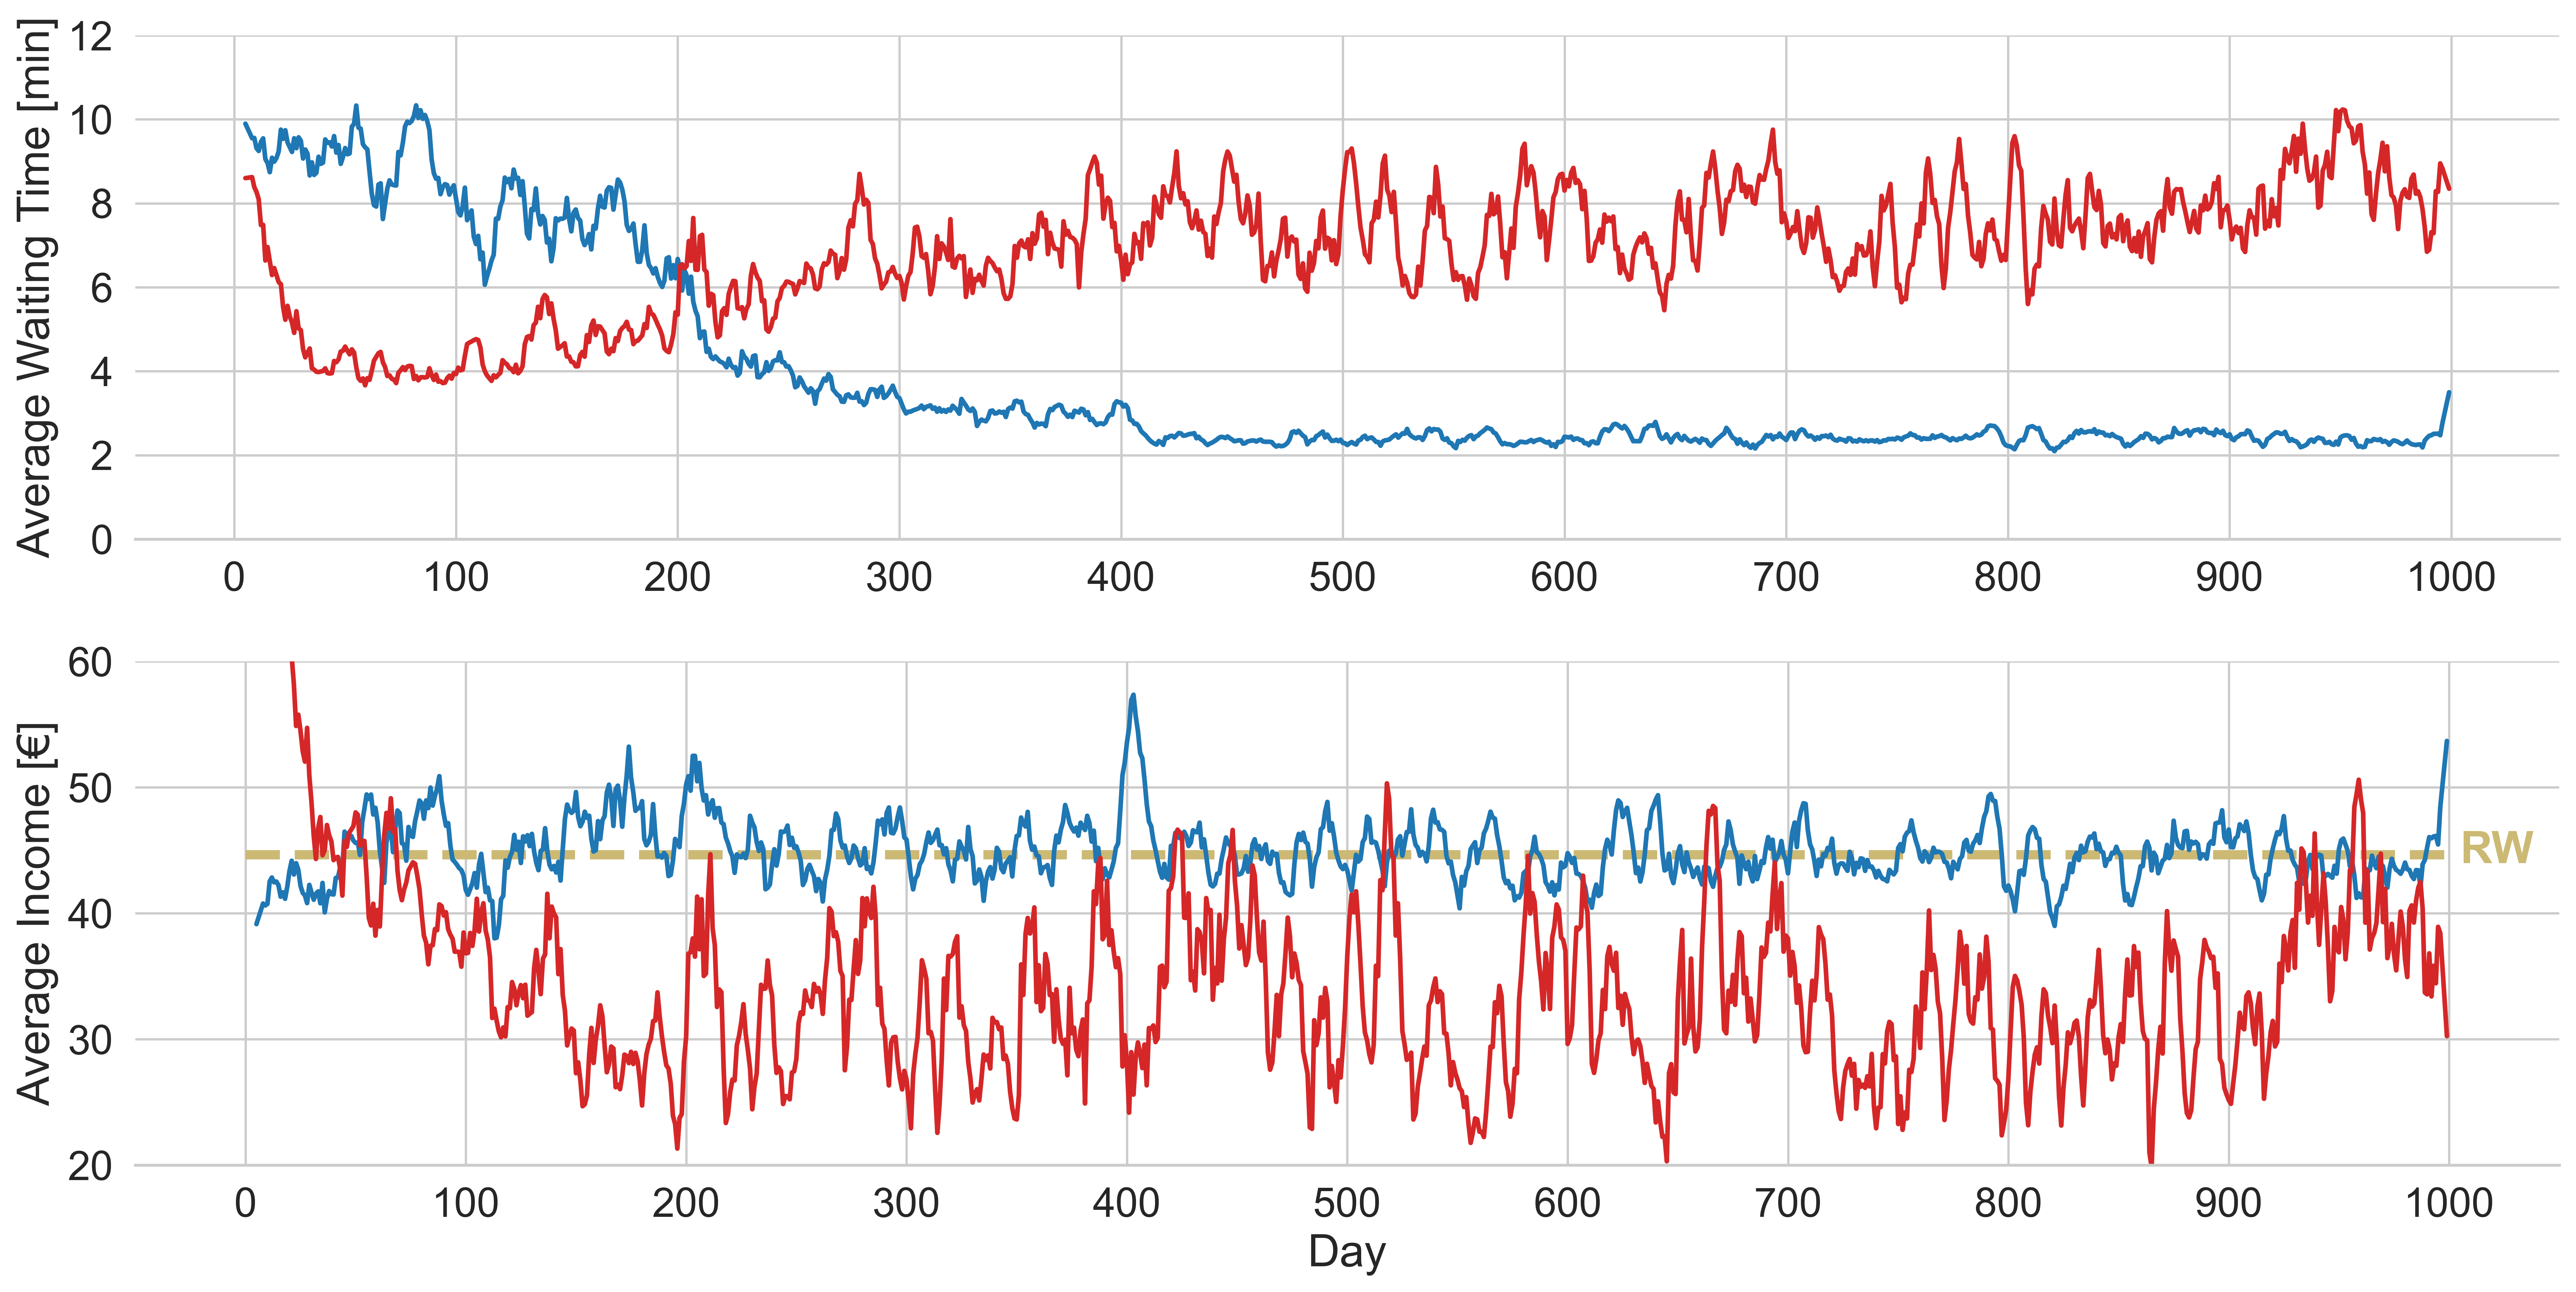

In [18]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
sns.despine(left=True)

c1 = 'C0'
c2 = 'C3'
RW = 4*11.16

sns.lineplot(x=demand_df.index, y=smooth(demand_df.P1_ACTUAL_WT), color=c1, lw=2, ax=ax[0])
sns.lineplot(x=demand_df.index, y=smooth(demand_df.P2_ACTUAL_WT), color=c2, lw=2, ax=ax[0])
ax[0].set(xlabel='', ylabel="Average Waiting Time [min]", ylim=(0,12))

sns.lineplot(x=supply_df.index, y=smooth(supply_df.P1_ACTUAL_INC), color=c1, lw=2, ax=ax[1])
sns.lineplot(x=supply_df.index, y=smooth(supply_df.P2_ACTUAL_INC), color=c2, lw=2, ax=ax[1])
ax[1].set(xlabel='Day', ylabel='Average Income [€]', ylim=(20,60))

ax[1].hlines([RW], 0, 1000, linestyles='dashed', colors='y', lw=4)
ax[1].annotate('RW', xy =(1005,44), fontweight='bold', color='y')    

ax[0].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))
ax[1].set_xticks(np.arange(0, demand_df.index.max() + 2, 100))

fig.align_ylabels()
plt.tight_layout()
plt.savefig('Figs/p3-Fig_10_20_wi.png')

In [ ]:
1- when should we stop simulation?

In [2]:
demand_df = pd.read_csv('competition_csv/demand_traj_p1_1.0_p2_2.0.csv')


In [3]:
demand_df

,Unnamed: 0,P1_EXPERIENCE_U,P2_EXPERIENCE_U,P1_WOM_U,P2_WOM_U,P1_MARKETING_U,P2_MARKETING_U,P1_OUT,P2_OUT,P1_ACTUAL_WT,...,ACCEPTS_OFFER,REJECTS_OFFER,ARRIVES_AT_PICKUP,MEETS_DRIVER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,SETS_OFF_FOR_DEST,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
0,0,0.010000,0.010000,0.010000,0.010000,0.011646,0.011646,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.010000,0.010000,0.010000,0.010000,0.013583,0.013450,18.0,16.0,10.250000,...,3.970588,0.0,8.823529,327.676471,13.235294,274.970588,4.411765,0.0,0.0,343.676471
2,2,0.010010,0.010000,0.010001,0.010001,0.015737,0.015435,37.0,35.0,11.590090,...,5.000000,0.0,13.333333,385.555556,20.000000,380.625000,6.666667,0.0,0.0,205.000000
3,3,0.010028,0.010000,0.010002,0.010002,0.018129,0.017756,44.0,42.0,9.684848,...,9.453488,0.0,18.604651,489.162791,27.906977,498.895349,9.302326,0.0,0.0,42.906977
4,4,0.010027,0.010000,0.010004,0.010003,0.020801,0.020484,59.0,65.0,11.140113,...,4.233871,0.0,12.741935,332.330645,19.112903,376.209677,6.370968,0.0,0.0,223.185484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.225067,0.014058,0.203968,0.032032,0.989107,0.989087,403.0,34.0,2.338503,...,14.725400,0.0,19.954233,174.931350,29.931350,438.601831,9.977117,0.0,0.0,1.407323
996,996,0.225136,0.014057,0.204203,0.032029,0.989116,0.989096,378.0,22.0,2.217681,...,14.700000,0.0,19.750000,157.577500,29.625000,429.365000,9.875000,0.0,0.0,7.687500
997,997,0.225097,0.014057,0.204177,0.032007,0.989125,0.989104,412.0,17.0,2.720510,...,15.000000,0.0,20.000000,170.237762,30.000000,442.233100,10.000000,0.0,0.0,0.000000
998,998,0.225098,0.014057,0.203637,0.032030,0.989134,0.989113,391.0,31.0,2.763384,...,14.822275,0.0,20.000000,195.973934,30.000000,446.625592,10.000000,0.0,0.0,0.000000
